In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
n = 4

const_oracle = QuantumCircuit(n+1)

output = 0
if output == 1:
    const_oracle.x(n)

In [4]:
balanced_oracle = QuantumCircuit(n+1)


# Use barrier as divider
balanced_oracle.barrier()
# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
balanced_oracle.barrier()

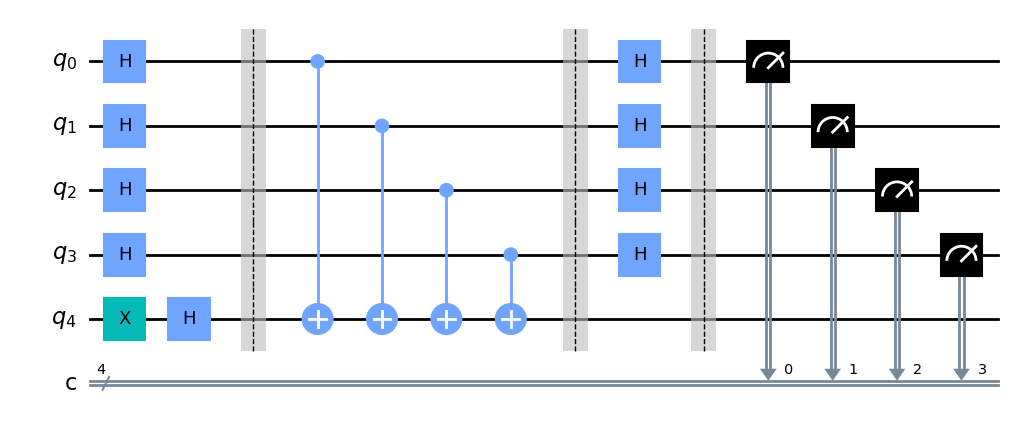

In [13]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw(output='mpl')

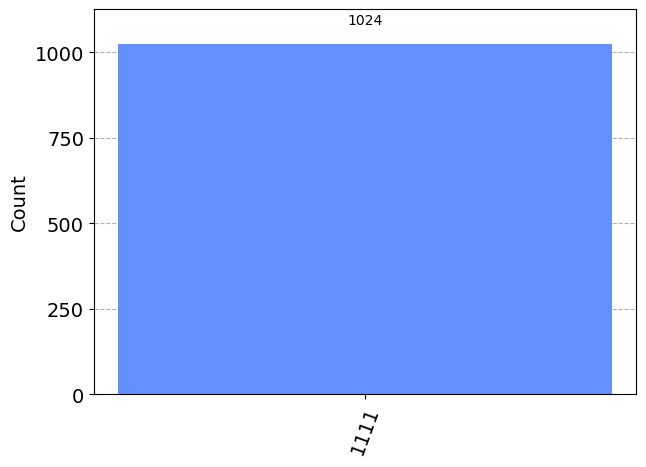

In [14]:
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [15]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.save_account('4c3d00897b7826ff54da08a63c8e03b60bf7f3de5762449cff9ee1324df45ffbe3feaf89bd0d49b67551372b9c084ef694404bbea3fbe4a4b9ec4a1ca34ab63e')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

configrc.store_credentials:WARNING:2023-12-05 18:58:55,584: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-12-05 18:58:56,189: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_osaka


In [16]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


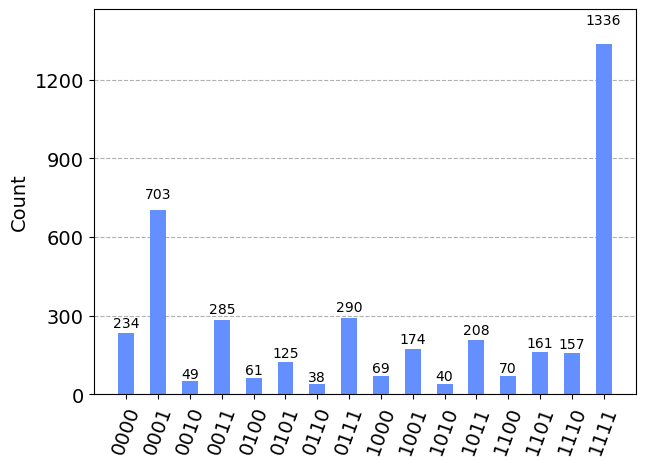

In [17]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)